In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path

import scipy
from scipy import signal

import tensorflow as tf
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

In [2]:
# a = pd.read_table(r'C:\Users\bansa\Documents\Python\csio_rw\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Jog\lvm\15-21-12.lvm',header=None)
a = pd.read_table(r'C:\Users\DELL\Desktop\Isens_backyard testing\Sensor_parallel to trench\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Jog\lvm\15-21-12.lvm',header=None)
a = a.drop([0,2,5,6,7,8],axis=1)
da = signal.detrend(a)
da /= 85.5

In [3]:
t1 = da[:,1]
# print(type(t1))
np.shape(t1)

(17300,)

In [4]:
th = 0.000005
l = []
for i in range(len(t1)):
    if t1[i] > th:
        l.append(i)
#         print(i)

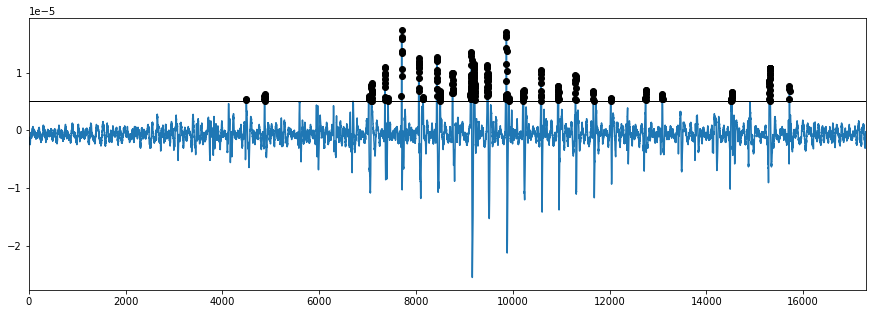

In [5]:
fig = plt.figure(figsize=(15, 5))

# ax = fig.add_subplot()

plt.plot(t1)
plt.margins(x=0)

# plt.tight_layout()
# ax.spines['bottom'].set_color('0.5')
# ax.spines['top'].set_color('0.5')
# ax.spines['right'].set_color('0.5')
# ax.spines['left'].set_color('0.5')
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1

plt.axhline(y=th, linewidth=1, color='k')
plt.plot(l,t1[l],'ko')

In [6]:
lf = []
lf.append(l[0])
for i in range(len(l)-1):
    if l[i]+150 < l[i+1]:
        lf.append(l[i+1])

In [7]:
lf

[4493,
 4867,
 7019,
 7354,
 7699,
 8054,
 8425,
 8750,
 9124,
 9468,
 9851,
 10207,
 10577,
 10928,
 11292,
 11664,
 12022,
 12741,
 13089,
 14509,
 15297,
 15716]

In [27]:
ts = np.array([t1[lf[0]-100:lf[0]+150]])
print(np.shape(ts))
for i in range(1,len(lf)):
    
#     row_n = ts.shape[0]
#     ts = np.insert(ts,row_n,t1[i-100:i+150],axis=0)
    
    ts = np.vstack([ts, t1[lf[i]-100:lf[i]+150]])
    
    # break

(1, 250)


In [9]:
ts
# np.shape(ts)

array([[-8.68523860e-07, -1.75113505e-06, -1.37874682e-06, ...,
         8.95563353e-09,  8.89329435e-09, -2.43932671e-07],
       [ 1.20857700e-07,  3.71964678e-07, -1.20857700e-07, ...,
         7.47666160e-07,  1.11579450e-06,  6.24566433e-07],
       [-7.46943704e-07, -1.12268234e-06, -7.44639376e-07, ...,
        -1.86354776e-06, -1.98830409e-06, -1.62573099e-06],
       ...,
       [-1.48422175e-06, -1.36726269e-06, -1.11385138e-06, ...,
        -1.61391041e-06, -1.99480593e-06, -1.62112234e-06],
       [-1.12381591e-06, -1.37498522e-06, -7.51788967e-07, ...,
        -6.31155361e-07, -1.00318238e-06, -7.57568343e-07],
       [-4.98215789e-07, -2.52825965e-07, -6.24628772e-07, ...,
         7.10019493e-10,  2.53535984e-07,  4.99150019e-07]])

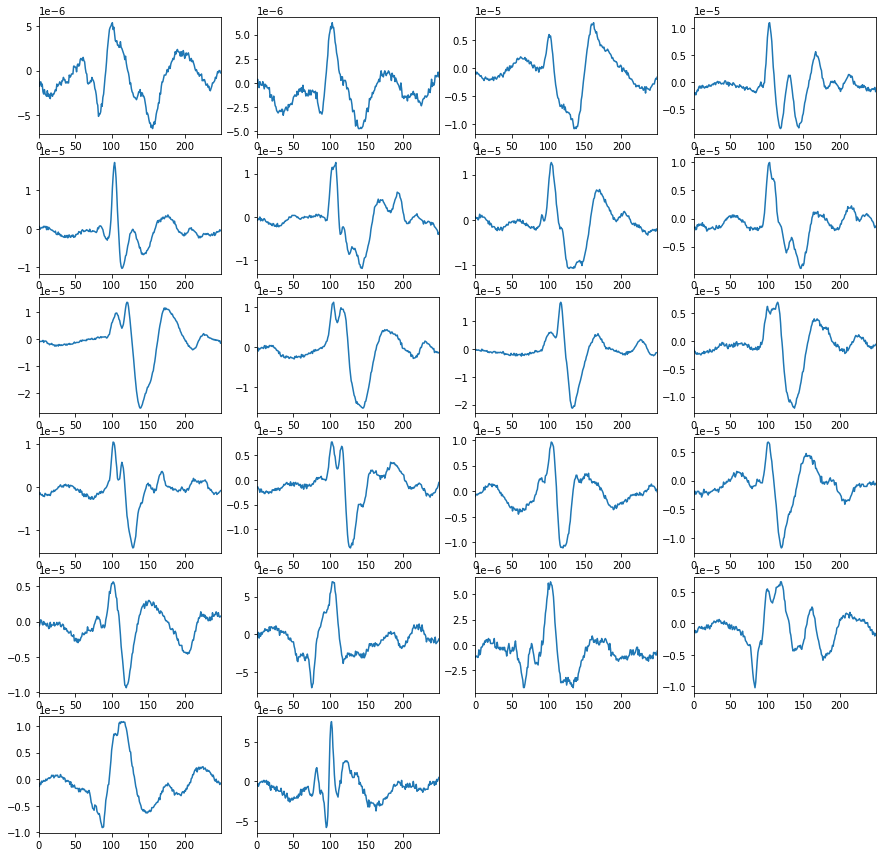

In [10]:
plt.figure(figsize=(15,15))
for i,t in enumerate(ts):
#     print(i)
#     print(x)
    ax = plt.subplot(6, 4, i + 1)
    ax.plot(t)
    plt.margins(x=0)
#     plt.tight_layout()
#     fig, axs = plt.subplots(5,5)
#     plt.plot(ts[i,:])

Start

In [11]:
dirname = r'C:\Users\DELL\Desktop\Jog_lvm'
paths = Path(dirname).glob('**/*.lvm',)

df = pd.DataFrame()

for path in paths:
    s = pd.read_table(path, header=None)
    s.drop([0, 2, 5, 6, 7, 8], axis=1, inplace=True)
    s = pd.DataFrame(signal.detrend(s)/85.5)
#     print(a.head())
    df = pd.concat([df, s], axis=1)

df = df.fillna(0)
df = df.T.reset_index().drop('index',axis=1).T

In [12]:
df.shape[1]

66

In [13]:
# ts = pd.DataFrame()
ts = np.empty([0,250])

for j in range(df.shape[1]):

    t = df[j]
    # print(type(t))
    
    l = []
    th = 0.00001025/2
    for i in range(len(t)):
        if t[i]>th:
            l.append(i)
    # print(l)
    
    lf = []
    lf.append(l[0])
    for i in range(len(l)-1):
        if l[i]+150 < l[i+1]:
            lf.append(l[i+1])
    # print(lf)

    for i in range(len(lf)): 
        # ts = pd.concat([ts, t[lf[i]-100:lf[i]+150]], ignore_index=True, axis=0)
        # ts = ts.append(t[lf[i]-100:lf[i]+150], ignore_index=True)
        ts = np.vstack([ts, t[lf[i]-100:lf[i]+150]])
        # print(np.shape(ts))
        # print(t[lf[i]-100:lf[i]+150])
        # break
    # break

In [14]:
t1 = pd.DataFrame(ts)
t1['Activity'] = 0
# t1

In [15]:
np.shape(ts)
# type(ts)

(1188, 250)

In [16]:
# plt.figure()
# for i,t in enumerate(ts):

#     ax = plt.subplot(27, 3, i + 1)
#     ax.plot(t)
#     # plt.margins(x=0)

In [17]:
# for i in range(len(ts)):
#     plt.figure()
#     plt.plot(ts[i,:])
#     plt.margins(x=0)

In [18]:
dirname = r'C:\Users\DELL\Desktop\Ham_lvm'
paths = Path(dirname).glob('**/*.lvm',)

df = pd.DataFrame()

for path in paths:
    s = pd.read_table(path, header=None)
    s.drop([0, 2, 5, 6, 7, 8], axis=1, inplace=True)
    s = pd.DataFrame(signal.detrend(s)/85.5)
#     print(a.head())
    df = pd.concat([df, s], axis=1)

df = df.fillna(0)
df = df.T.reset_index().drop('index',axis=1).T

# for column in df.columns:
#     df[column] = df[column] / df[column].abs().max()

In [19]:
df.shape[1]

15

In [28]:
ts = np.empty([0,250])

for j in range(df.shape[1]):

    t = df[j]
    print(np.shape(t))
    
    l = []
    th = 0.0000205
    for i in range(len(t)):
        if t[i]>th:
            l.append(i)
    # print(l)
    
    lf = []
    lf.append(l[0])
    for i in range(len(l)-1):
        if l[i]+150 < l[i+1]:
            lf.append(l[i+1])
    # print(lf)

    for i in range(len(lf)): 
        # ts = pd.concat([ts, t[lf[i]-100:lf[i]+150]], ignore_index=True, axis=0)
        # ts = ts.append(t[lf[i]-100:lf[i]+150], ignore_index=True)
        ts = np.vstack([ts, t[lf[i]-100:lf[i]+150]])
        # print(np.shape(ts))
        # print(t[lf[i]-100:lf[i]+150])
        # break
    # break

(1248,)


IndexError: list index out of range

In [21]:
t2 = pd.DataFrame(ts)
t2['Activity'] = 1
# ts

In [22]:
# ts
np.shape(t2)

(60, 251)

In [23]:
# for i in range(len(ts)):
#     plt.figure()
#     plt.plot(ts[i,:])
#     plt.margins(x=0)

In [24]:
df = pd.DataFrame()
df = pd.concat([t1, t2], axis=0)
df = df.sample(frac = 1)
df = df.reset_index().drop('index',axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Activity
0,9.934420e-07,1.234709e-06,8.629062e-07,1.114138e-06,1.245035e-06,9.877249e-07,1.369729e-06,1.126058e-06,1.124177e-06,8.685239e-07,...,1.206959e-07,-3.898635e-14,2.453899e-07,-4.982158e-07,-2.528259e-07,-2.453899e-07,1.189769e-07,-6.171927e-07,-2.453899e-07,0
1,9.976957e-07,9.372668e-07,9.369741e-07,9.372668e-07,1.118329e-06,1.059781e-06,1.063680e-06,9.957464e-07,9.993523e-07,1.178758e-06,...,7.443841e-07,7.469811e-07,4.949835e-07,6.216891e-07,3.760065e-07,6.176784e-07,6.213964e-07,3.155777e-07,6.202316e-08,0
2,1.558769e-06,1.496391e-06,1.433184e-06,1.495563e-06,1.623097e-06,1.495563e-06,1.555879e-06,1.681464e-06,1.681464e-06,1.496279e-06,...,-6.627680e-08,3.762183e-07,6.237817e-07,8.693957e-07,8.693957e-07,1.307637e-06,1.182881e-06,1.553027e-06,1.617355e-06,0
3,2.486408e-07,5.602389e-07,5.585823e-07,4.357753e-07,4.998101e-07,4.978608e-07,4.981535e-07,6.209605e-07,6.245664e-07,7.524366e-07,...,1.124109e-06,8.745959e-07,8.102685e-07,6.877542e-07,5.610485e-07,5.006196e-07,5.006196e-07,6.270326e-07,4.382727e-07,0
4,1.250802e-07,4.962789e-07,4.339007e-07,3.754212e-07,4.377993e-07,5.633528e-07,5.653333e-07,3.762495e-07,3.119220e-07,4.990253e-07,...,1.432749e-06,1.062409e-06,1.189084e-06,1.059264e-06,8.704732e-07,9.328513e-07,6.874614e-07,4.987015e-07,4.950644e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,6.086478e-08,1.856211e-07,6.270203e-08,-6.205431e-08,1.152164e-09,6.547965e-08,2.514620e-07,-1.219911e-07,6.822612e-08,-6.714865e-08,...,-6.321887e-08,-1.255970e-07,-3.755333e-07,-1.859138e-07,-3.160448e-07,-2.527262e-07,-2.453899e-07,-3.085964e-07,-3.085964e-07,0
1244,1.060429e-06,1.064327e-06,6.833698e-07,9.325586e-07,6.844908e-07,5.577852e-07,4.313722e-07,3.756018e-07,1.859823e-07,4.379799e-07,...,1.859014e-07,5.577852e-07,7.474046e-07,1.060429e-06,1.064327e-06,1.124756e-06,9.949368e-07,9.932802e-07,1.121642e-06,0
1245,9.910382e-07,1.122807e-06,8.646252e-07,6.284651e-07,3.756391e-07,6.229098e-07,2.508828e-07,4.983776e-07,-1.191387e-07,-2.438950e-07,...,-6.237817e-07,-7.407407e-07,-7.446394e-07,-1.114885e-06,-1.286550e-07,-1.114885e-06,-7.563353e-07,-6.315789e-07,-8.732943e-07,0
1246,1.267368e-07,1.871657e-07,6.353033e-08,1.239592e-07,3.090820e-07,1.239592e-07,1.219475e-07,1.851540e-07,1.286550e-07,3.118285e-07,...,1.259583e-07,6.086478e-08,-3.103339e-07,-4.373322e-07,-4.373322e-07,-6.889063e-07,-9.317427e-07,-1.058448e-06,-1.245614e-06,1


In [25]:
ts.shape[0]

60

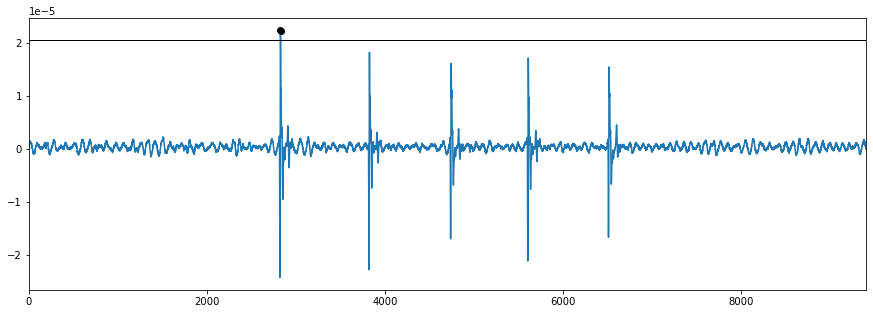

In [26]:
a = pd.read_table(r'C:\Users\DELL\Desktop\Isens_backyard testing\Sensor_parallel to trench\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Hammering\lvm\15-22-46.lvm',header=None)
a = a.drop([0,2,5,6,7,8],axis=1)
da = signal.detrend(a)
da /= 85.5
t1 = da[:,2]

th = 0.0000205
l = []
for i in range(len(t1)):
    if t1[i] > th:
        l.append(i)

fig = plt.figure(figsize=(15, 5))

# ax = fig.add_subplot()

plt.plot(t1)
plt.margins(x=0)

plt.axhline(y=th, linewidth=1, color='k')
plt.plot(l,t1[l],'ko')